### Desafío 2: Prediciendo precios de propiedades

Para predecir el precio de las propiedades se seguirán los siguientes pasos:

    1. Lectura, análisis de la tabla y eliminación de columnas que no serán utilizadas
    2. Generación de dummies para variables categóricas
    3. Análisis de diferentes alternativas para determinar qué features considerar
    4. Generación del modelo para estimar USD por m2 cubierto
    5. Generación del modelo para estimar USD por m2 total
    6. Determinación de propiedades sobreevaluadas y subvaluadas
    7. Elección del mejor portafolio de propiedades a comprar con el capital disponible
       

#### 1. Lectura, análisis de la tabla y eliminación de columnas que no serán utilizadas

In [1]:
#Se importa la funcionalidad necesaria
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Lectura del archivo
df_properati_d2=pd.read_csv('Properati_desafio_1.csv')
                              

In [3]:
#se guarda con otro nombre porque se harán modificaciones en df_properati_d2.
df_properati =  df_properati_d2    

In [4]:
#Revisión de la tabla
df_properati_d2.head()

,Unnamed: 0,Tipo propiedad,Localidad,Ubicación completa,Provincia,Ubicación id,lat-lon,lat,lon,Precio,...,Expensas,Descripción,Título,USD por m2 cub. corregido,Umbral outlier superior,Umbral outlier inferior,USD por m2 tot. corregido,Pozo,Estrenar,Amenities
0,0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1550.000000,2792.577561,-37.364719,1127.272727,0,0,0
1,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,...,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,1745.517984,2392.857143,964.285714,1655.464996,0,1,0
2,2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909,3278.846154,432.692308,1309.090909,0,0,0
3,3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,...,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,2016.295743,2847.003525,263.689777,1517.746743,0,0,0
4,4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,1828.571429,2962.395112,802.920076,1828.571429,0,0,0


In [5]:
#Nos quedamos sólo con las columnas que usaremos
df_properati_d2=df_properati_d2[['Tipo propiedad','Ubicación completa',
       'USD por m2 cub. corregido', 'USD por m2 tot. corregido', 'Pozo',
       'Estrenar', 'Amenities']]

df_properati_d2.rename(columns={"USD por m2 cub. corregido": "USD por m2 cub.",
                                "USD por m2 tot. corregido": "USD por m2 tot."},inplace=True)
df_properati_d2.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Tipo propiedad,Ubicación completa,USD por m2 cub.,USD por m2 tot.,Pozo,Estrenar,Amenities
0,PH,|Argentina|Capital Federal|Mataderos|,1550.000000,1127.272727,0,0,0
1,apartment,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,1745.517984,1655.464996,0,1,0
2,apartment,|Argentina|Capital Federal|Mataderos|,1309.090909,1309.090909,0,0,0
3,PH,|Argentina|Capital Federal|Liniers|,2016.295743,1517.746743,0,0,0
4,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,1828.571429,1828.571429,0,0,0


#### 2. Generación de dummies para variables categóricas

In [6]:
#Se genera un df de dummies para el tipo de propiedad y luego se concatena con df_properati_d2
df_dummies = pd.get_dummies(df_properati_d2['Tipo propiedad'], prefix='Tipo_prop',drop_first=True)
df_properati_d2=pd.concat([df_properati_d2,df_dummies], axis=1)
df_properati_d2.head()

,Tipo propiedad,Ubicación completa,USD por m2 cub.,USD por m2 tot.,Pozo,Estrenar,Amenities,Tipo_prop_apartment,Tipo_prop_house,Tipo_prop_store
0,PH,|Argentina|Capital Federal|Mataderos|,1550.000000,1127.272727,0,0,0,0,0,0
1,apartment,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,1745.517984,1655.464996,0,1,0,1,0,0
2,apartment,|Argentina|Capital Federal|Mataderos|,1309.090909,1309.090909,0,0,0,1,0,0
3,PH,|Argentina|Capital Federal|Liniers|,2016.295743,1517.746743,0,0,0,0,0,0
4,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,1828.571429,1828.571429,0,0,0,1,0,0


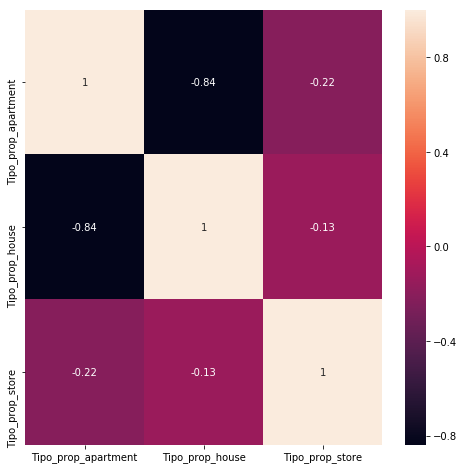

In [7]:
#Analizamos la correlación entre los tipos de propiedad. Se puede ver que hay mucha correlación entre las casas y los
#departamentos. Esto es porque la mayoría de los casos son o casas o departamentos, por lo tanto, cuanto uno es cero,
#generalmente el otro es 1.
plt.figure(figsize=(8,8))
tipo_propiedad=df_properati_d2[['Tipo_prop_apartment','Tipo_prop_house','Tipo_prop_store']]
sns.heatmap(tipo_propiedad.corr(),annot=True)

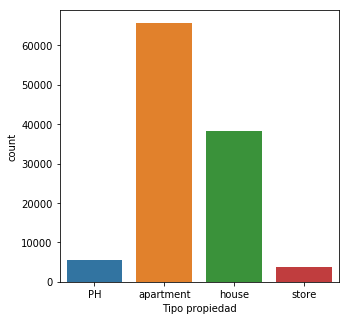

In [8]:
#Se grafica para analizar cómo se distribuyen las propiedades

plt.figure(figsize=(5,5))
sns.countplot(x='Tipo propiedad',data=df_properati_d2)

In [9]:
df_properati_d2['Tipo propiedad'].value_counts()

apartment    65691
house        38305
PH            5552
store         3763
Name: Tipo propiedad, dtype: int64

In [10]:
#Se lleva a dummies "Ubicación completa"
#Se analiza la cantidad de ubicaciones:

df_properati_d2['Ubicación completa'].unique().shape

(816,)

In [11]:
#Son 816 ubicaciones, dado que son demasiadas, se decide clasificarlas en función del valor promedio de m2 cubierto y del
#tipo de propiedad. Para ello se genera una columna con el promedio por m2 agrupando por las categorías mencionadas

df_properati_d2['Promedio USD/m2 cub'] = df_properati_d2[['USD por m2 cub.',
                                                               'Ubicación completa','Tipo propiedad']
                                                             ].groupby(['Ubicación completa','Tipo propiedad']
                                                                      ).transform(lambda x: x.mean())

In [12]:
#Se crea una columna que clasifique las ubicaciones en funcion del valor por m2 tomando rangos de 200 USD/m2

df_properati_d2['Rango m2 cub.']=pd.cut(df_properati_d2['Promedio USD/m2 cub'],
             [0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000,
             3200,3400,3600,3800,4000,4200,4400,4600,4800,5000,5200,5400,5600,5800,6000,
             6200,6400,6600,6800,7000,7200,7400,7600,7800,8000,8200,8400,8600,8800])


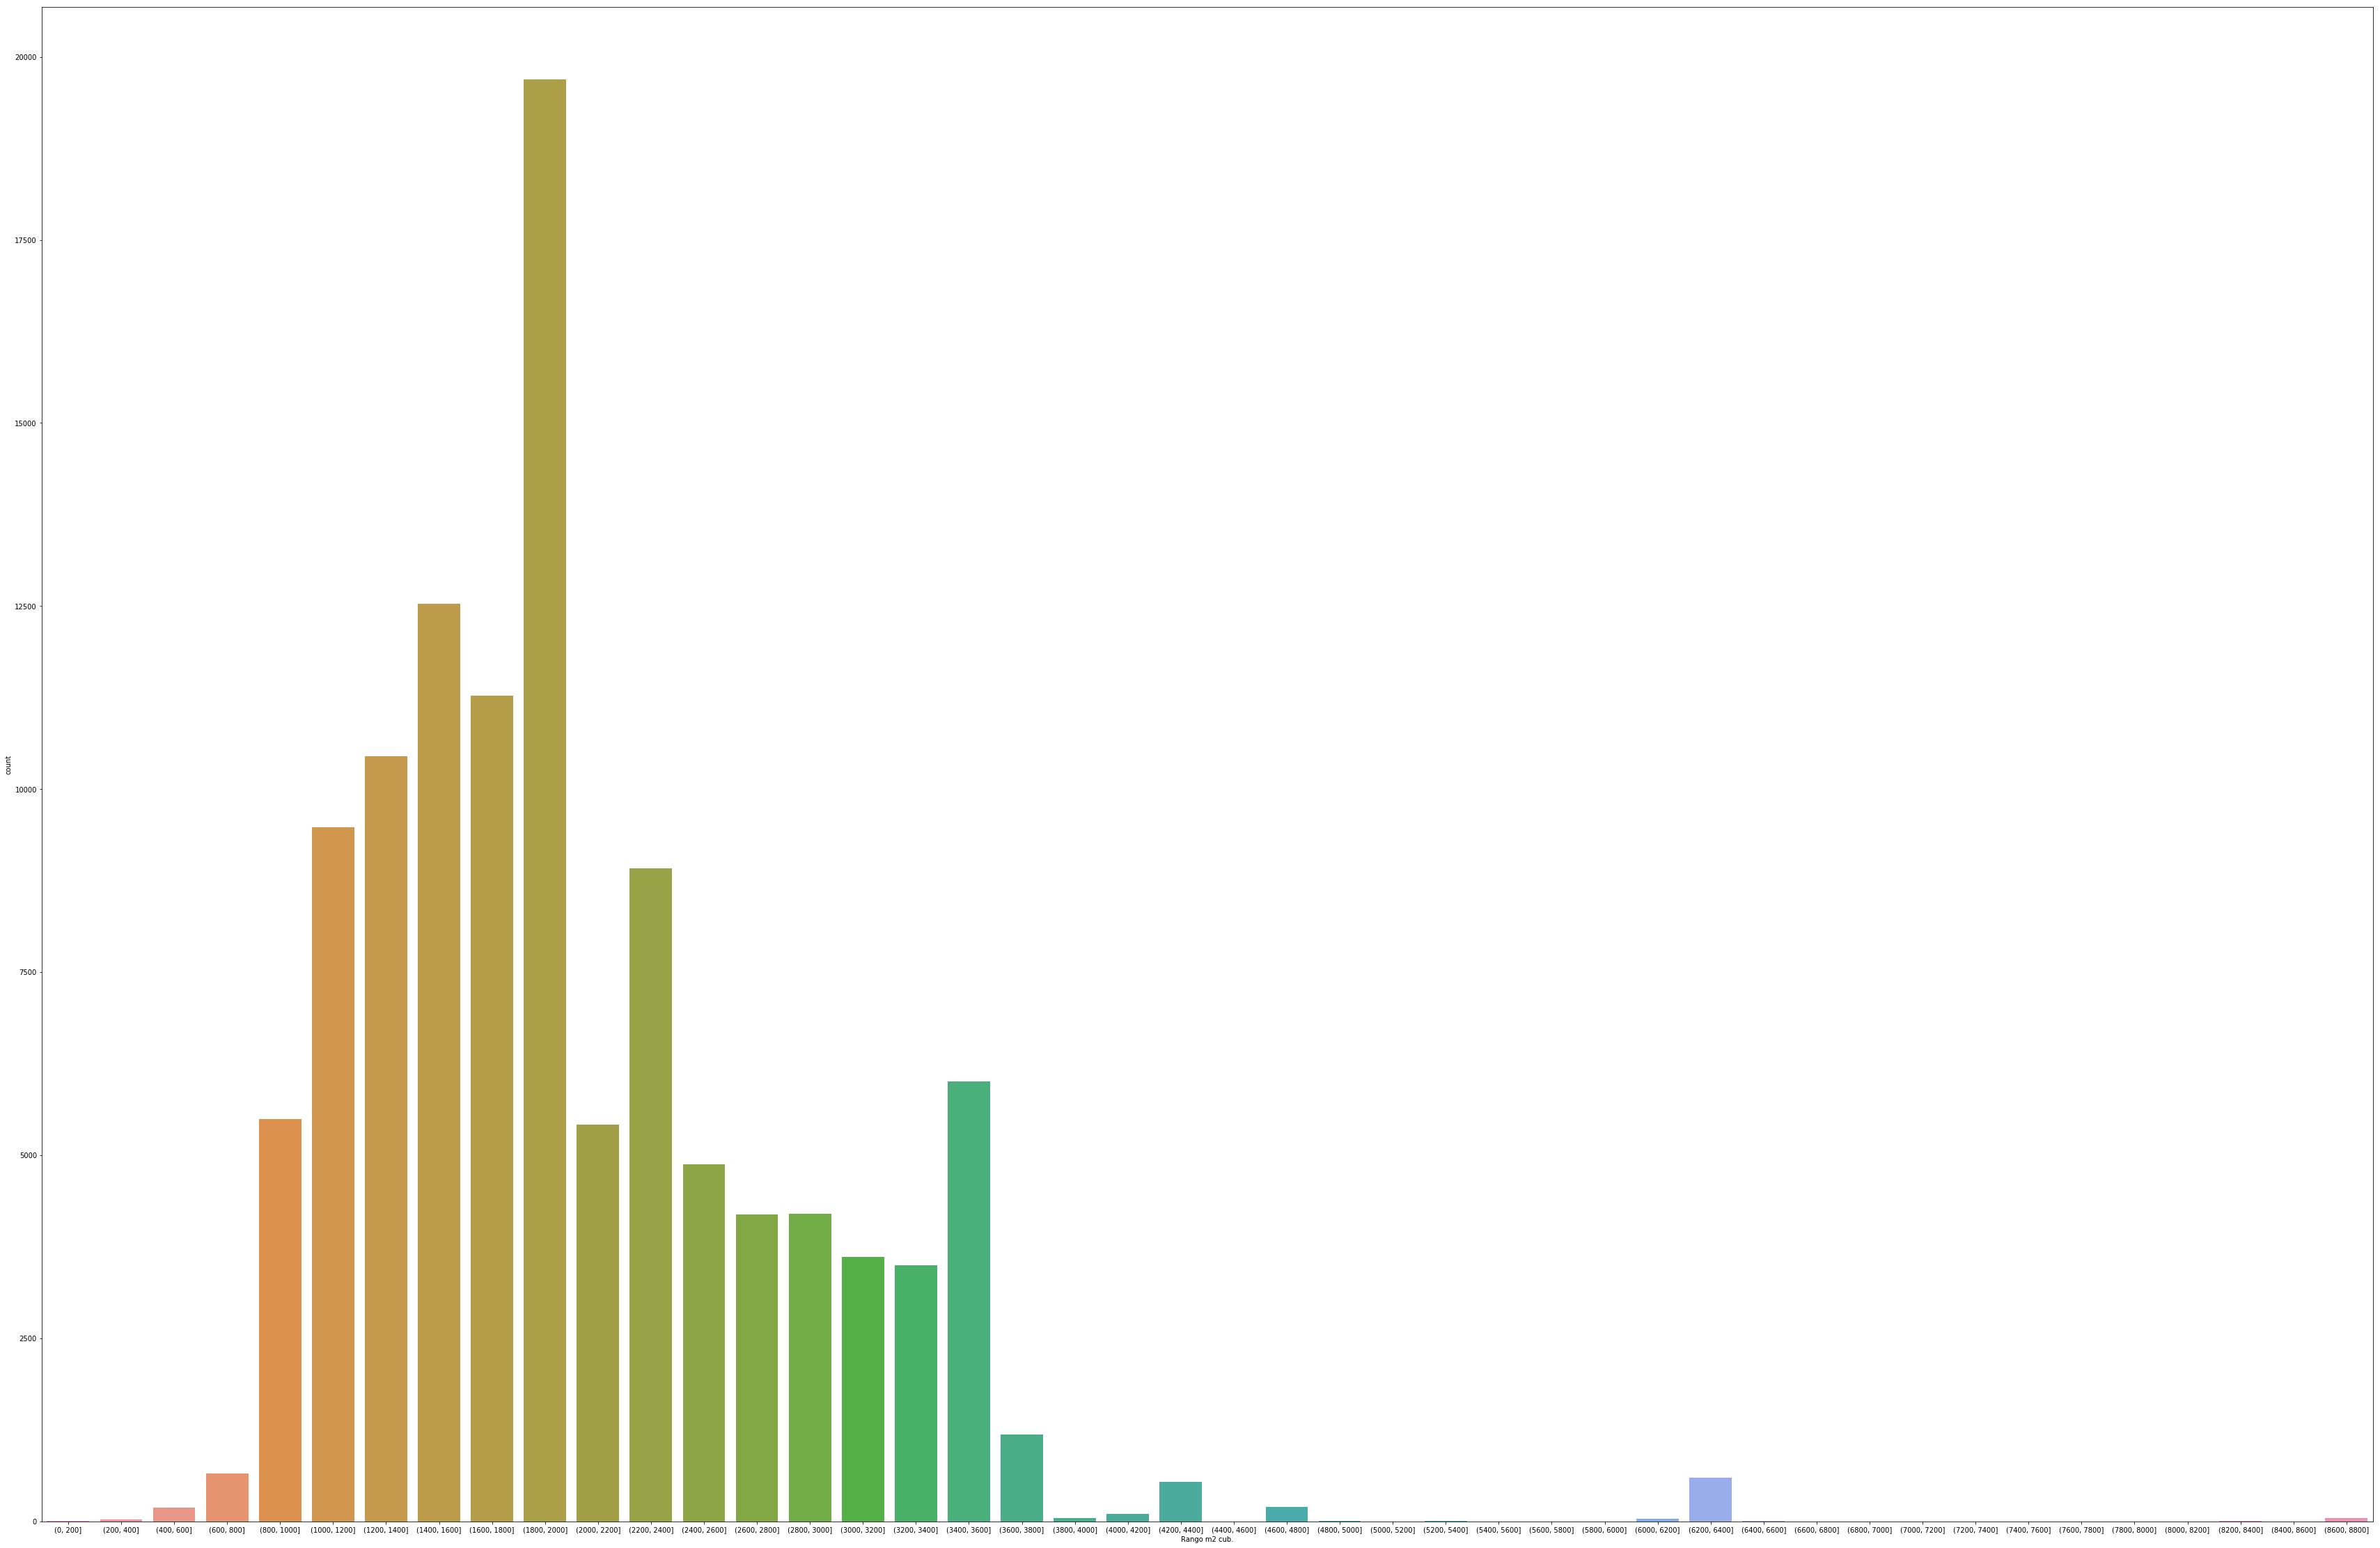

In [13]:
#Se grafica para analizar cómo se distribuyen las propiedades

plt.figure(figsize=(60,40))
sns.countplot(x='Rango m2 cub.',data=df_properati_d2)

In [14]:
#Se genera un df de dummies para la clasificación de las ubicaciones.

df_dummies2 = pd.get_dummies(df_properati_d2['Rango m2 cub.'], prefix='Ubicación',drop_first=True)
df_properati_d2=pd.concat([df_properati_d2,df_dummies2], axis=1)
df_properati_d2.head()


,Tipo propiedad,Ubicación completa,USD por m2 cub.,USD por m2 tot.,Pozo,Estrenar,Amenities,Tipo_prop_apartment,Tipo_prop_house,Tipo_prop_store,...,"Ubicación_(6800, 7000]","Ubicación_(7000, 7200]","Ubicación_(7200, 7400]","Ubicación_(7400, 7600]","Ubicación_(7600, 7800]","Ubicación_(7800, 8000]","Ubicación_(8000, 8200]","Ubicación_(8200, 8400]","Ubicación_(8400, 8600]","Ubicación_(8600, 8800]"
0,PH,|Argentina|Capital Federal|Mataderos|,1550.000000,1127.272727,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,apartment,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,1745.517984,1655.464996,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,apartment,|Argentina|Capital Federal|Mataderos|,1309.090909,1309.090909,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PH,|Argentina|Capital Federal|Liniers|,2016.295743,1517.746743,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,1828.571429,1828.571429,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Se eliminan las columnas que no se usarán
df_properati_d2.drop(columns=['Promedio USD/m2 cub', 'Rango m2 cub.','Tipo propiedad','Ubicación completa'],inplace=True)

#### 3. Análisis de diferentes alternativas para determinar qué features considerar

In [16]:
#importamos las librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

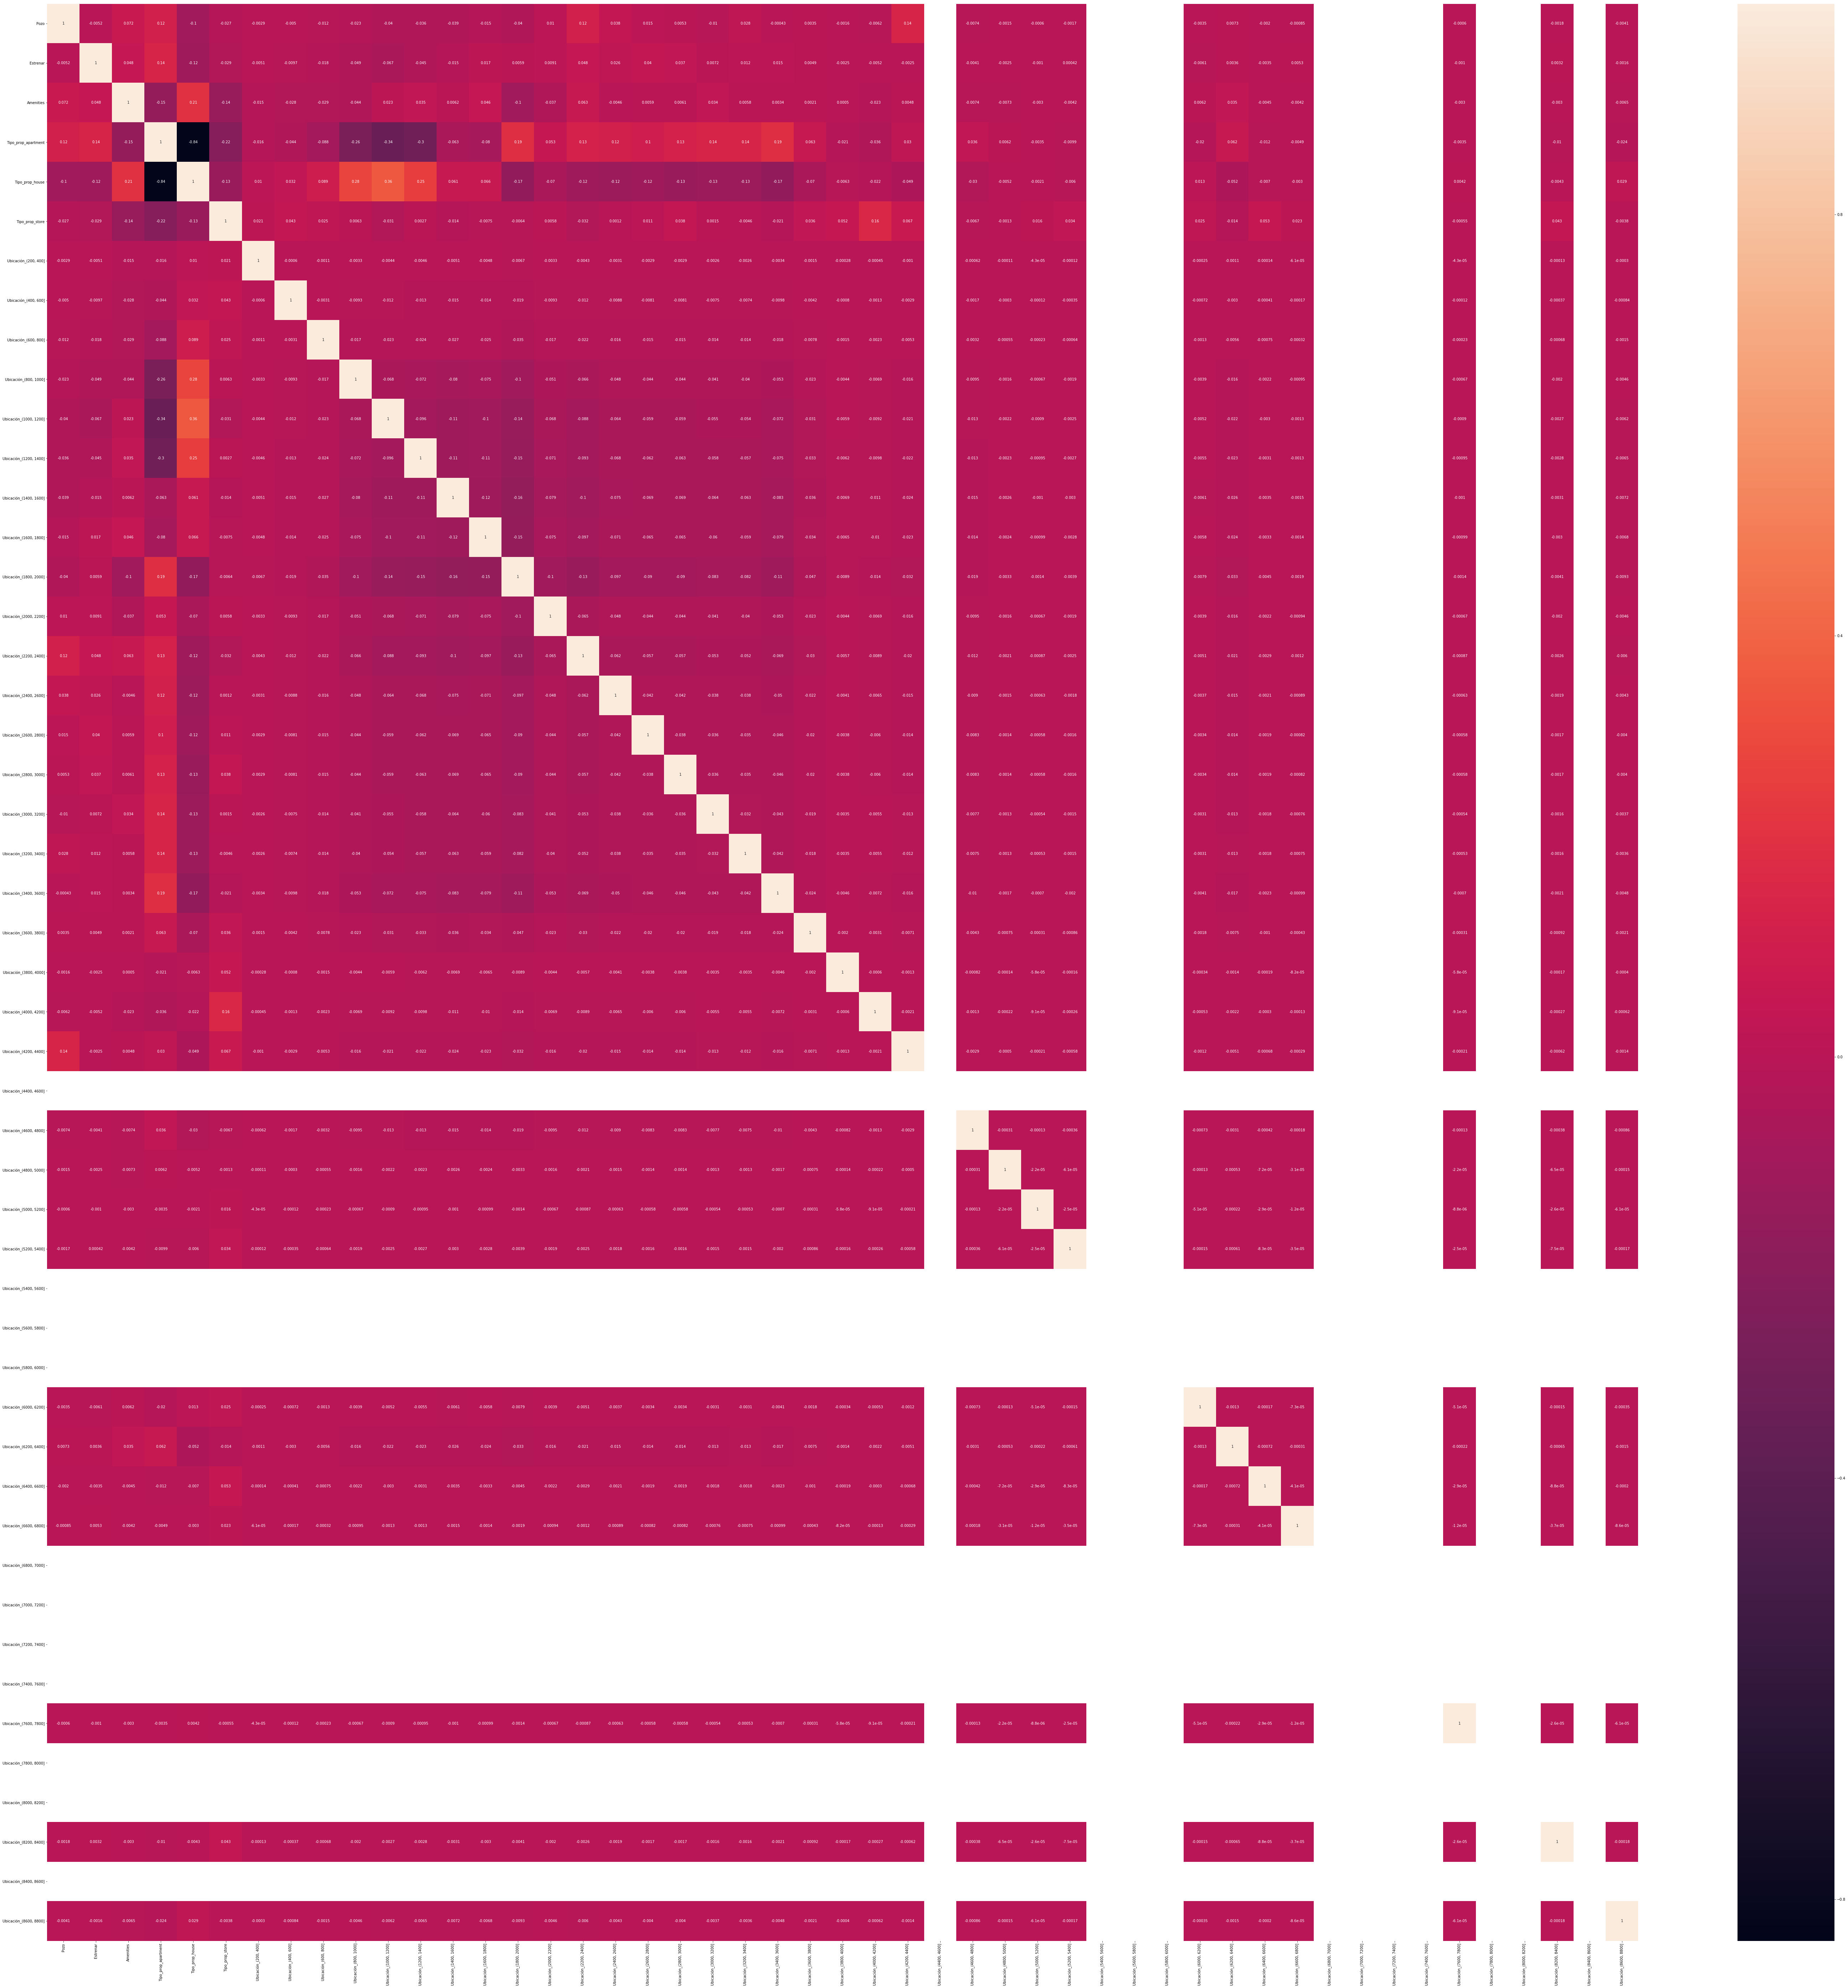

In [17]:
#Analizamos la correlación entre las features
plt.figure(figsize=(100,100))
features=df_properati_d2.drop(columns=['USD por m2 tot.','USD por m2 cub.'])
sns.heatmap(features.corr(),annot=True)

In [18]:
# Definimos una función que acepta una lista de features y devuelve la prueba RMSE y R2 para evaluar cuál es la mejor 
#combinación de features a utilizar

def train_test_rmse(feature_cols):
    X = df_properati_d2[feature_cols]
    y = df_properati_d2['USD por m2 cub.']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)
    print ("r2 train:", model.score(X_train,y_train))
    print ("r2 test:", model.score(X_test,y_test))
    print ("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    print ("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
        

In [19]:
#Probamos diferentes modelos tomando diferentes alternativas de features
train_test_rmse(['Estrenar', 'Pozo', 'Amenities','Tipo_prop_apartment', 'Tipo_prop_house',
       'Tipo_prop_store'])

r2 train: 0.24333711337488173
r2 test: 0.2516417837737639
RMSE train: 855.9496894075594
RMSE test: 860.4891571902523


In [20]:
#Probamos diferentes modelos tomando diferentes alternativas de features
train_test_rmse(['Estrenar', 'Pozo', 'Amenities'])

r2 train: 0.021342529417293754
r2 test: 0.02102503104929243
RMSE train: 974.2881017911654
RMSE test: 982.2361166044486


In [21]:
#Probamos diferentes modelos tomando diferentes alternativas de features
train_test_rmse(['Estrenar', 'Pozo', 'Tipo_prop_apartment', 'Tipo_prop_house',
       'Tipo_prop_store'])

r2 train: 0.21578603876625924
r2 test: 0.22354073133181762
RMSE train: 876.3203815855197
RMSE test: 865.0546337207973


In [22]:
#Probamos diferentes modelos tomando diferentes alternativas de features
train_test_rmse(['Estrenar', 'Pozo', 'Amenities','Tipo_prop_apartment', 'Tipo_prop_house',
       'Tipo_prop_store','Ubicación_(200, 400]', 'Ubicación_(400, 600]',
       'Ubicación_(600, 800]', 'Ubicación_(800, 1000]',
       'Ubicación_(1000, 1200]', 'Ubicación_(1200, 1400]',
       'Ubicación_(1400, 1600]', 'Ubicación_(1600, 1800]',
       'Ubicación_(1800, 2000]', 'Ubicación_(2000, 2200]',
       'Ubicación_(2200, 2400]', 'Ubicación_(2400, 2600]',
       'Ubicación_(2600, 2800]', 'Ubicación_(2800, 3000]',
       'Ubicación_(3000, 3200]', 'Ubicación_(3200, 3400]',
       'Ubicación_(3400, 3600]', 'Ubicación_(3600, 3800]',
       'Ubicación_(3800, 4000]', 'Ubicación_(4000, 4200]',
       'Ubicación_(4200, 4400]', 'Ubicación_(4400, 4600]',
       'Ubicación_(4600, 4800]', 'Ubicación_(4800, 5000]',
       'Ubicación_(5000, 5200]', 'Ubicación_(5200, 5400]',
       'Ubicación_(5400, 5600]', 'Ubicación_(5600, 5800]',
       'Ubicación_(5800, 6000]', 'Ubicación_(6000, 6200]',
       'Ubicación_(6200, 6400]', 'Ubicación_(6400, 6600]',
       'Ubicación_(6600, 6800]', 'Ubicación_(6800, 7000]',
       'Ubicación_(7000, 7200]', 'Ubicación_(7200, 7400]',
       'Ubicación_(7400, 7600]', 'Ubicación_(7600, 7800]',
       'Ubicación_(7800, 8000]', 'Ubicación_(8000, 8200]',
       'Ubicación_(8200, 8400]', 'Ubicación_(8400, 8600]',
       'Ubicación_(8600, 8800]'])

r2 train: 0.7222194745693251
r2 test: 0.7252318556067812
RMSE train: 517.9124195917833
RMSE test: 523.0206534372584


In [23]:
#Probamos diferentes modelos tomando diferentes alternativas de features. El mejor modelo parece ser el que incluye todas
#las columnas
train_test_rmse(['Estrenar', 'Pozo', 'Amenities','Tipo_prop_apartment', 'Tipo_prop_house',
       'Tipo_prop_store','Ubicación_(200, 400]', 'Ubicación_(400, 600]',
       'Ubicación_(600, 800]', 'Ubicación_(800, 1000]',
       'Ubicación_(1000, 1200]', 'Ubicación_(1200, 1400]',
       'Ubicación_(1400, 1600]', 'Ubicación_(1600, 1800]',
       'Ubicación_(1800, 2000]', 'Ubicación_(2000, 2200]',
       'Ubicación_(2200, 2400]', 'Ubicación_(2400, 2600]',
       'Ubicación_(2600, 2800]', 'Ubicación_(2800, 3000]',
       'Ubicación_(3000, 3200]', 'Ubicación_(3200, 3400]',
       'Ubicación_(3400, 3600]', 'Ubicación_(3600, 3800]',
       'Ubicación_(3800, 4000]', 'Ubicación_(4000, 4200]',
       'Ubicación_(4200, 4400]', 'Ubicación_(4400, 4600]',
       'Ubicación_(4600, 4800]', 'Ubicación_(4800, 5000]',
       'Ubicación_(5000, 5200]', 'Ubicación_(5200, 5400]',
       'Ubicación_(5400, 5600]', 'Ubicación_(5600, 5800]',
       'Ubicación_(5800, 6000]', 'Ubicación_(6000, 6200]',
       'Ubicación_(6200, 6400]', 'Ubicación_(6400, 6600]',
       'Ubicación_(6600, 6800]', 'Ubicación_(6800, 7000]',
       'Ubicación_(7000, 7200]', 'Ubicación_(7200, 7400]',
       'Ubicación_(7400, 7600]', 'Ubicación_(7600, 7800]',
       'Ubicación_(7800, 8000]', 'Ubicación_(8000, 8200]',
       'Ubicación_(8200, 8400]', 'Ubicación_(8400, 8600]',
       'Ubicación_(8600, 8800]'])

r2 train: 0.725420539804103
r2 test: 0.7136869913634363
RMSE train: 518.1756278600448
RMSE test: 526.1654645620772


#### 4. Generación del modelo para estimar USD por m2 cubierto

In [24]:
#Se decide entonces avanzar con el modelo incluyendo todas las columnas

X_cub=df_properati_d2.drop(columns=['USD por m2 tot.','USD por m2 cub.'])
y_cub=df_properati_d2['USD por m2 cub.']

In [25]:
#Separamos la base en train y test. Tomamos el 30% de la base para testear
X_cub_train, X_cub_test, y_cub_train, y_cub_test = train_test_split(X_cub, y_cub, test_size=0.30)
print(X_cub_train.shape, y_cub_train.shape)
print(X_cub_test.shape, y_cub_test.shape)

(79317, 49) (79317,)
(33994, 49) (33994,)


In [26]:
# Seleccionamos alphas para ridge y lasso e instanciamos un Kfolds para la validación cruzada 
alphas_ridge_cub = np.linspace(0.01, 5, 300)
alphas_lasso_cub = np.linspace(0.01, 5, 300)
kf_cub = KFold(n_splits=10, shuffle=True)

# Instanciamos los modelos
lm_cub = LinearRegression(fit_intercept=False)
lm_cub_ridge_cv= RidgeCV(alphas=alphas_ridge_cub, cv=kf_cub, normalize=False)
lm_cub_lasso_cv = LassoCV(alphas=alphas_lasso_cub, cv=kf_cub, normalize=False)

In [27]:
# Hacemos los fits respectivos

lm_cub.fit(X_cub_train, y_cub_train)
lm_cub_ridge_cv.fit(X_cub_train, y_cub_train)
lm_cub_lasso_cv.fit(X_cub_train, y_cub_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

LassoCV(alphas=array([0.01   , 0.02669, ..., 4.98331, 5.     ]), copy_X=True,
    cv=KFold(n_splits=10, random_state=None, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [28]:
#Vemos los valores de alpha para cada modelo
print('Alpha Ridge cub:',lm_cub_ridge_cv.alpha_,'\n'
      'Alpha LASSO cub:',lm_cub_lasso_cv.alpha_,'\n')

Alpha Ridge cub: 0.19357859531772578 
Alpha LASSO cub: 0.01 



In [29]:
# Calculamos el R2 para el train set

print(" Score Train Lineal: %.5f\n" % lm_cub.score(X_cub_train, y_cub_train),
      "Score Train Ridge : %.5f\n" % lm_cub_ridge_cv.score(X_cub_train, y_cub_train),
      "Score Train Lasso : %.5f\n" %  lm_cub_lasso_cv.score(X_cub_train, y_cub_train))

 Score Train Lineal: 0.72269
 Score Train Ridge : 0.72246
 Score Train Lasso : 0.72246



In [30]:
# Hacemos las predicciones sobre la matriz de predictores del Train Set

y_cub_pred_tr_lm = lm_cub.predict(X_cub_train)
y_cub_pred_tr_ridge = lm_cub_ridge_cv.predict(X_cub_train)
y_cub_pred_tr_lasso = lm_cub_lasso_cv.predict(X_cub_train)

# Calculamos el RMSE para el train set

rmse = lambda y_cub, y_cub_pred: np.sqrt(mean_squared_error(y_cub, y_cub_pred))

print(" Train RMSE lineal   : %.5f \n" % rmse(y_cub_train,y_cub_pred_tr_lm),
      "Train RMSE Ridge    : %.5f \n" % rmse(y_cub_train,y_cub_pred_tr_ridge),
      "Train RMSE Lasso    : %.5f \n" % rmse(y_cub_train,y_cub_pred_tr_lasso))

 Train RMSE lineal   : 519.07436 
 Train RMSE Ridge    : 519.29369 
 Train RMSE Lasso    : 519.29005 



In [31]:
# Calculamos el R2 para el test set

print(" Score Test Lineal: %.5f\n" % lm_cub.score(X_cub_test, y_cub_test),
      "Score Test Ridge : %.5f\n" % lm_cub_ridge_cv.score(X_cub_test, y_cub_test),
      "Score Test Lasso : %.5f\n" %  lm_cub_lasso_cv.score(X_cub_test, y_cub_test))

 Score Test Lineal: 0.72378
 Score Test Ridge : 0.72362
 Score Test Lasso : 0.72362



In [32]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

y_cub_pred_lm = lm_cub.predict(X_cub_test)
y_cub_pred_ridge = lm_cub_ridge_cv.predict(X_cub_test)
y_cub_pred_lasso = lm_cub_lasso_cv.predict(X_cub_test)


# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_cub_test, y_cub_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_cub_test, y_cub_pred_ridge),
      "Test RMSE Lasso = %.2f\n" %  rmse(y_cub_test, y_cub_pred_lasso),
     )

 Test RMSE lineal= 520.68
 Test RMSE Ridge = 520.82
 Test RMSE Lasso = 520.83



In [33]:
# Analizamos los ceoficientes para cada caso
lm_cub.coef_

array([ 4.10796728e+01,  8.41061480e+01,  9.81273464e+01,  6.62207233e+00,
       -1.38643326e+01,  2.76031736e+01,  3.05949634e+02,  4.58561278e+02,
        6.95976255e+02,  8.76830067e+02,  1.07424997e+03,  1.25452749e+03,
        1.42086166e+03,  1.65248668e+03,  1.84629018e+03,  2.02617325e+03,
        2.21072807e+03,  2.44105778e+03,  2.63974978e+03,  2.79745036e+03,
        3.00044774e+03,  3.28101784e+03,  3.44465440e+03,  3.59342212e+03,
        3.62816733e+03,  4.20438894e+03,  4.15346440e+03, -7.27595761e-12,
        4.66313832e+03,  4.78948939e+03,  5.02290188e+03,  7.33246049e+03,
        4.54747351e-12,  9.09494702e-13,  1.81898940e-12,  6.01642639e+03,
        6.21169045e+03,  6.80773913e+03,  6.58659375e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.79164211e+03,
        0.00000000e+00,  0.00000000e+00,  8.03093691e+03,  0.00000000e+00,
        8.57959153e+03])

In [34]:
lm_cub_ridge_cv.coef_

array([   41.0684194 ,    84.20486561,    98.43126969,     6.73098323,
         -14.42200969,    29.34769227, -2182.04842456, -2048.49885683,
       -1813.02745441, -1632.79012681, -1435.42766028, -1255.31009588,
       -1089.16578203,  -857.56329792,  -663.90396473,  -483.99519705,
        -299.51126512,   -69.24327248,   129.39785685,   287.02718467,
         490.0339581 ,   770.61481504,   934.28431537,  1082.71440596,
        1107.34300502,  1688.10279964,  1641.94941119,     0.        ,
        2149.61976056,  2194.39768804,  2103.86836578,  4641.26916576,
           0.        ,     0.        ,     0.        ,  3480.95793962,
        3699.63733361,  4180.2808218 ,  3715.18465229,     0.        ,
           0.        ,     0.        ,     0.        ,  4425.49380386,
           0.        ,     0.        ,  5370.57726201,     0.        ,
        6029.74928379])

In [35]:
lm_cub_lasso_cv.coef_

array([   40.82187171,    84.08863108,    98.4441454 ,     6.66835759,
         -14.70246692,    29.23918675, -2108.30775966, -1991.31253027,
       -1757.75304428, -1578.38326438, -1381.08168692, -1201.00514145,
       -1034.92193917,  -803.29779639,  -609.7237376 ,  -429.66806396,
        -245.2364193 ,   -14.88648746,   183.25195707,   340.89258197,
         543.86070009,   824.46627933,   988.24503926,  1136.11623877,
        1135.16056973,  1735.85479525,  1694.89062574,     0.        ,
        2200.76824162,  2174.80992566,  1772.09668204,  4716.45864373,
           0.        ,     0.        ,     0.        ,  3530.7728691 ,
        3753.56684716,  4236.70350106,  3732.38239977,     0.        ,
           0.        ,     0.        ,     0.        ,  4543.31114694,
           0.        ,     0.        ,  5459.95155133,     0.        ,
        6096.96153403])

Los 3 modelos son muy similares, no hay diferencias significativas en sus scores. Decidimos quedarnos con la 
Regresión Lasso ya que fue la que presentó mayor R2 y menor MSE para la mayoría de los casos en el test set

Entonces, el modelo con el que se pedecirán los valores por m2 cubierto es ***lm_cub_lasso_cv***

#### 5. Generación del modelo para estimar USD por m2 total

In [36]:
#Se definen Y e y

X_tot=df_properati_d2.drop(columns=['USD por m2 tot.','USD por m2 cub.'])
y_tot=df_properati_d2['USD por m2 tot.']

In [37]:
#Separamos la base en train y test. Tomamos el 30% de la base para testear
X_tot_train, X_tot_test, y_tot_train, y_tot_test = train_test_split(X_tot, y_tot, test_size=0.30)
print(X_tot_train.shape, y_tot_train.shape)
print(X_tot_test.shape, y_tot_test.shape)

(79317, 49) (79317,)
(33994, 49) (33994,)


In [38]:
# Seleccionamos alphas para ridge y lasso e instanciamos un Kfolds para la validación cruzada 
alphas_ridge_tot = np.linspace(0.01, 5, 300)
alphas_lasso_tot = np.linspace(0.01, 5, 300)
kf_tot = KFold(n_splits=10, shuffle=True)

# Instanciamos los modelos
lm_tot = LinearRegression(fit_intercept=False)
lm_tot_ridge_cv= RidgeCV(alphas=alphas_ridge_tot, cv=kf_tot, normalize=False)
lm_tot_lasso_cv = LassoCV(alphas=alphas_lasso_tot, cv=kf_tot, normalize=False)

In [39]:
#Hacemos los fits respectivos

lm_tot.fit(X_tot_train, y_tot_train)
lm_tot_ridge_cv.fit(X_tot_train, y_tot_train)
lm_tot_lasso_cv.fit(X_tot_train, y_tot_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

LassoCV(alphas=array([0.01   , 0.02669, ..., 4.98331, 5.     ]), copy_X=True,
    cv=KFold(n_splits=10, random_state=None, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [40]:
#Vemos los valores de alpha para cada modelo
print('Alpha Ridge tot:',lm_tot_ridge_cv.alpha_,'\n'
      'Alpha LASSO tot:',lm_tot_lasso_cv.alpha_,'\n')

Alpha Ridge tot: 1.628829431438127 
Alpha LASSO tot: 0.02668896321070234 



In [41]:
#Performance de cada modelo en el training set
# Calculamos el R2

print(" Score Train Lineal: %.5f\n" % lm_tot.score(X_tot_train, y_tot_train),
      "Score Train Ridge : %.5f\n" % lm_tot_ridge_cv.score(X_tot_train, y_tot_train),
      "Score Train Lasso : %.5f\n" %  lm_tot_lasso_cv.score(X_tot_train, y_tot_train))

 Score Train Lineal: 0.75018
 Score Train Ridge : 0.74977
 Score Train Lasso : 0.74989



In [42]:
# Hacemos las predicciones sobre la matriz de predictores del Train Set

y_tot_pred_tr_lm = lm_tot.predict(X_tot_train)
y_tot_pred_tr_ridge = lm_tot_ridge_cv.predict(X_tot_train)
y_tot_pred_tr_lasso = lm_tot_lasso_cv.predict(X_tot_train)

# Calculamos el RMSE para el training set

rmse = lambda y_tot, y_tot_pred: np.sqrt(mean_squared_error(y_tot, y_tot_pred))

print(" Train RMSE lineal   : %.5f \n" % rmse(y_tot_train,y_tot_pred_tr_lm),
      "Train RMSE Ridge    : %.5f \n" % rmse(y_tot_train,y_tot_pred_tr_ridge),
      "Train RMSE Lasso    : %.5f \n" % rmse(y_tot_train,y_tot_pred_tr_lasso))

 Train RMSE lineal   : 450.42379 
 Train RMSE Ridge    : 450.79071 
 Train RMSE Lasso    : 450.68585 



In [43]:
# Calculamos el R2 para el test set

print(" Score Test Lineal: %.5f\n" % lm_tot.score(X_tot_test, y_tot_test),
      "Score Test Ridge : %.5f\n" % lm_tot_ridge_cv.score(X_tot_test, y_tot_test),
      "Score Test Lasso : %.5f\n" %  lm_tot_lasso_cv.score(X_tot_test, y_tot_test))

 Score Test Lineal: 0.74646
 Score Test Ridge : 0.74629
 Score Test Lasso : 0.74656



In [44]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

y_tot_pred_lm = lm_tot.predict(X_tot_test)
y_tot_pred_ridge = lm_tot_ridge_cv.predict(X_tot_test)
y_tot_pred_lasso = lm_tot_lasso_cv.predict(X_tot_test)


# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_tot_test, y_tot_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_tot_test, y_tot_pred_ridge),
      "Test RMSE Lasso = %.2f\n" %  rmse(y_tot_test, y_tot_pred_lasso),
     )

 Test RMSE lineal= 450.81
 Test RMSE Ridge = 450.97
 Test RMSE Lasso = 450.73



In [45]:
# Analizamos los ceoficientes para cada caso
lm_tot.coef_

array([ 1.67165690e+01,  5.92538353e+01,  3.34995485e+01,  2.37953550e+02,
       -5.10756662e+01,  1.85834757e+02,  2.26603421e+02,  3.06634469e+02,
        4.38250113e+02,  7.01149892e+02,  8.03683053e+02,  1.02457643e+03,
        1.13229237e+03,  1.36603735e+03,  1.49412110e+03,  1.64918439e+03,
        1.83266524e+03,  1.96206909e+03,  2.18737680e+03,  2.26224477e+03,
        2.35300331e+03,  2.70795948e+03,  2.89090878e+03,  2.92979208e+03,
        2.82077599e+03,  3.30425807e+03,  2.77094653e+03,  2.10036433e-11,
        4.00570212e+03,  3.39403561e+03,  4.86467029e+03,  2.06845275e+03,
        4.09272616e-12, -4.54747351e-13, -9.09494702e-13,  5.86084233e+03,
        5.64032626e+03,  3.28192560e+02,  7.75491141e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.71938975e+03,  0.00000000e+00,
        6.33103184e+02])

In [46]:
lm_tot_ridge_cv.coef_

array([   16.64338037,    59.5993182 ,    34.17730266,   238.68624273,
         -52.11339961,   188.44123446, -1766.35036094, -1822.35928578,
       -1707.72723738, -1450.37674565, -1348.21021138, -1127.71111613,
       -1020.60283699,  -786.91530082,  -659.30242508,  -504.06200328,
        -320.88622773,  -191.58790118,    33.57526197,   108.24625009,
         198.92497118,   553.70653754,   736.75972046,   774.27379722,
         630.94928847,  1124.11915537,   614.09115652,     0.        ,
        1830.63488435,   935.74897377,  1030.62790488,   -70.29050631,
           0.        ,     0.        ,     0.        ,  3480.83808627,
        3472.98853678, -1482.38935135,  2129.93682037,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,   477.71016005,     0.        ,
       -1449.36367982])

In [47]:
lm_tot_lasso_cv.coef_

array([   16.08294172,    59.22687173,    33.90858777,   238.16993039,
         -52.43174613,   187.8115857 , -1685.18796613, -1705.73573757,
       -1585.8021253 , -1327.00087989, -1224.77086308, -1004.21063169,
        -896.99196261,  -663.22949133,  -535.62426943,  -380.12498381,
        -196.90891151,   -67.38492253,   156.55147581,   231.28685567,
         321.92101857,   676.90731692,   860.22279104,   896.93290734,
         716.9585292 ,  1243.88642275,   735.05206015,     0.        ,
        1960.43886335,   940.68063257,   716.04407439,     0.        ,
           0.        ,     0.        ,     0.        ,  3746.5178863 ,
        3605.09236953, -1401.24951659,  3606.31202641,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,   452.68203298,     0.        ,
       -1333.14544603])

Los 3 modelos son muy similares, no hay diferencias significativas en sus scores. Decidimos quedarnos con la 
Regresión Lineal ya que fue la que presentó mayor R2 y menor MSE para la mayoría de los casos en el el test set

Entonces, el modelo con el que se pedecirán los valores por m2 cubierto es ***lm_tot***

#### 6. Determinación de propiedades sobrevaluadas y subvaluadas

In [48]:
#Estimamos los valores del m2 cubierto para toda la base de datos y los registramos en la tabla
y_cub_estimado=lm_cub_lasso_cv.predict(X_cub)
df_properati_d2['USD por m2 cub. estimado']=y_cub_estimado

In [49]:
#Estimamos los valores del m2 total para toda la base de datos y los registramos en la tabla
y_tot_estimado=lm_tot.predict(X_tot)
df_properati_d2['USD por m2 tot. estimado']=y_tot_estimado

In [50]:
#Para poder determinar el capital con el que se cuenta y definir qué propuiedades están sobrevaluadas o subvaluadas
#se necesita contar con los m2 de las propiedades. Es necesario eliminar los registros NaN
#Se decide trabajar con los valores de m2 cubierto

In [51]:
#Para armar el portafolio, se hace un merge con df_properati ya que hay datos que df_properati_d2 no tiene

portafolio=pd.merge(df_properati_d2, df_properati[['M2 totales','M2 cubiertos','Precio aprox USD',
                                                  'Tipo propiedad','Localidad','Ubicación completa',
                                                  'Provincia','Título']], left_index=True, right_index=True)


In [52]:
#Se eliminan columnas que no se usarán
portafolio=portafolio[['USD por m2 cub.', 'Pozo', 'Estrenar', 'Amenities',
              'USD por m2 cub. estimado', 'M2 cubiertos', 'Tipo propiedad', 'Localidad',
       'Ubicación completa', 'Provincia','Precio aprox USD','Título']]

In [53]:
portafolio['M2 cubiertos'].isnull().value_counts()

False    95504
True     17807
Name: M2 cubiertos, dtype: int64

In [54]:
#Se completan los que se pueden con fórmula
portafolio['M2 cubiertos2']= np.where((portafolio['M2 cubiertos'].isnull()== True) |
                                            (portafolio['M2 cubiertos'] == 0),
                                          portafolio['Precio aprox USD']/portafolio['USD por m2 cub.'],
                                          portafolio['M2 cubiertos'])
portafolio['M2 cubiertos2'].isnull().value_counts()

False    107981
True       5330
Name: M2 cubiertos2, dtype: int64

In [55]:
#Nos quedamos con la columna M2 cubiertos2
portafolio.drop(columns=['M2 cubiertos'],inplace=True)
portafolio.rename(columns={"M2 cubiertos2": "M2 cubiertos"},inplace=True)
portafolio.shape

(113311, 12)

In [56]:
#Eliminamos los NaN de M2 cuibiertos
portafolio.dropna(subset=['M2 cubiertos'],inplace=True)
portafolio.shape

(107981, 12)

In [57]:
#Calculamos los valores de las propiedades reales y estimados
portafolio['Precios USD real']=portafolio['M2 cubiertos']*portafolio['USD por m2 cub.']
portafolio['Precios USD estimado']=round(portafolio['M2 cubiertos']*portafolio['USD por m2 cub. estimado'],2)
portafolio.head()

,USD por m2 cub.,Pozo,Estrenar,Amenities,USD por m2 cub. estimado,Tipo propiedad,Localidad,Ubicación completa,Provincia,Precio aprox USD,Título,M2 cubiertos,Precios USD real,Precios USD estimado
0,1550.000000,0,0,0,1652.701295,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,2 AMB TIPO CASA SIN EXPENSAS EN PB,40.000000,62000.0,66108.05
1,1745.517984,0,1,0,1743.458283,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,85.934377,150000.0,149823.00
2,1309.090909,0,0,0,2032.999385,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,55.000000,72000.0,111814.97
3,2016.295743,0,0,0,2026.331027,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,PH 3 amb. cfte. reciclado,47.116104,95000.0,95472.82
4,1828.571429,0,0,0,1852.943711,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,35.000000,64000.0,64853.03


In [58]:
#Se calcula las diferencias entre el valor del m2 cubierto real y el estimado (valores nominales y porcentuales)
portafolio['Dif. m2 cubierto USD']=round(portafolio['USD por m2 cub.']-portafolio['USD por m2 cub. estimado'],2)
portafolio['Dif. m2 cubierto %']=round((portafolio['USD por m2 cub.']-portafolio['USD por m2 cub. estimado'])/
                                       portafolio['USD por m2 cub. estimado']*100,2)
portafolio.head()

,USD por m2 cub.,Pozo,Estrenar,Amenities,USD por m2 cub. estimado,Tipo propiedad,Localidad,Ubicación completa,Provincia,Precio aprox USD,Título,M2 cubiertos,Precios USD real,Precios USD estimado,Dif. m2 cubierto USD,Dif. m2 cubierto %
0,1550.000000,0,0,0,1652.701295,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,2 AMB TIPO CASA SIN EXPENSAS EN PB,40.000000,62000.0,66108.05,-102.70,-6.21
1,1745.517984,0,1,0,1743.458283,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,85.934377,150000.0,149823.00,2.06,0.12
2,1309.090909,0,0,0,2032.999385,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,55.000000,72000.0,111814.97,-723.91,-35.61
3,2016.295743,0,0,0,2026.331027,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,PH 3 amb. cfte. reciclado,47.116104,95000.0,95472.82,-10.04,-0.50
4,1828.571429,0,0,0,1852.943711,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,35.000000,64000.0,64853.03,-24.37,-1.32


In [59]:
#Se ordena de mayor diferencia a menor diferencia
portafolio=portafolio.sort_values(by='Dif. m2 cubierto USD', ascending=True)

In [60]:
#Se considera que las propiedades que tienen una diferencia de +/- 15% en el valor del m2 cubierto están mal valuadas
#Se hacen los cortes:

portafolio['Valuacion']=pd.cut(portafolio['Dif. m2 cubierto %'],[-100,-15,15,300],labels=['Sub','Ok','Sobre'])
portafolio['Valuacion'].value_counts()


Ok       65822
Sub      22270
Sobre    19889
Name: Valuacion, dtype: int64

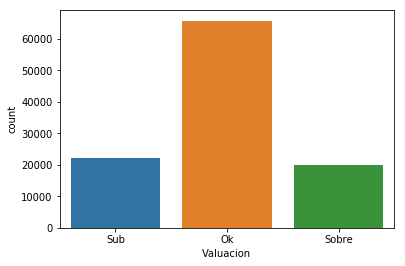

In [61]:
#Se grafica para ver las proporciones
sns.countplot(portafolio['Valuacion'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


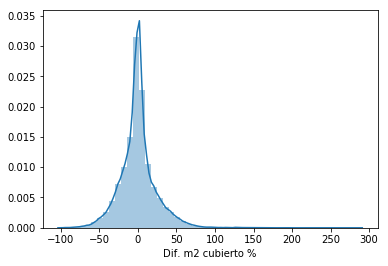

In [62]:
sns.distplot(portafolio['Dif. m2 cubierto %'])

#### 7. Elección del mejor portafolio de propiedades a comprar con el capital disponible

In [63]:
#Para determinar el capital con el que se cuenta se toma una muestra aleatoria de 100 propiedades
portafolio_100=portafolio.sample(100,random_state=0)

In [64]:
#El capital es la suma de los precios de venta de las propiedades
capital=portafolio_100['Precios USD real'].sum()
print('Capital = USD %.2f' % capital)                          

Capital = USD 20893838.86


In [65]:
#Se calcula la suma acumulada de los precios reales de compra para determinar hasta dónde se pueden comprar propiedades
#con el capital que se cuenta

portafolio['Sum acum']=portafolio['Precios USD real'].cumsum()
portafolio.head()

,USD por m2 cub.,Pozo,Estrenar,Amenities,USD por m2 cub. estimado,Tipo propiedad,Localidad,Ubicación completa,Provincia,Precio aprox USD,Título,M2 cubiertos,Precios USD real,Precios USD estimado,Dif. m2 cubierto USD,Dif. m2 cubierto %,Valuacion,Sum acum
113192,1093.631650,0,0,0,8538.258158,house,San Miguel de Tucumán,|Argentina|Tucumán|San Miguel de Tucumán|,Tucumán,218726.33,Casa - San Miguel De Tucumán,200.0,218726.33,1707651.63,-7444.63,-87.19,Sub,218726.33
83643,1000.000000,0,0,0,7945.189829,store,Villa Gesell,|Argentina|Buenos Aires Costa Atlántica|Villa ...,Buenos Aires Costa Atlántica,160000.00,Local a la venta con excelente ubicación en Vi...,160.0,160000.00,1271230.37,-6945.19,-87.41,Sub,378726.33
64141,518.518519,0,0,0,6721.941779,store,Llavallol,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Bs.As. G.B.A. Zona Sur,140000.00,Ideal super o inversor para renta,270.0,140000.00,1814924.28,-6203.42,-92.29,Sub,518726.33
18516,1088.235294,0,0,0,7201.696922,store,Villa Luro,|Argentina|Capital Federal|Villa Luro|,Capital Federal,185000.00,Venta Galpón p/ Deposito o Taller mecanico - V...,170.0,185000.00,1224288.48,-6113.46,-84.89,Sub,703726.33
71574,744.047619,0,0,1,6820.385924,store,Llavallol,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Bs.As. G.B.A. Zona Sur,500000.00,Edificio Comercial - Turdera,672.0,500000.00,4583299.34,-6076.34,-89.09,Sub,1203726.33


In [66]:
#Con el capital se pueden comprar 120 propiedades
portafolio[portafolio['Sum acum']<=capital]['Sum acum'].count()

119

In [79]:
#Entonces, el portafoflio de propiedades a comprar es el siguiente
prop_a_comprar=portafolio.iloc[:portafolio[portafolio['Sum acum']<=capital]['Sum acum'].count(),]
prop_a_comprar.head()

,USD por m2 cub.,Pozo,Estrenar,Amenities,USD por m2 cub. estimado,Tipo propiedad,Localidad,Ubicación completa,Provincia,Precio aprox USD,Título,M2 cubiertos,Precios USD real,Precios USD estimado,Dif. m2 cubierto USD,Dif. m2 cubierto %,Valuacion,Sum acum
113192,1093.631650,0,0,0,8538.258158,house,San Miguel de Tucumán,|Argentina|Tucumán|San Miguel de Tucumán|,Tucumán,218726.33,Casa - San Miguel De Tucumán,200.0,218726.33,1707651.63,-7444.63,-87.19,Sub,218726.33
83643,1000.000000,0,0,0,7945.189829,store,Villa Gesell,|Argentina|Buenos Aires Costa Atlántica|Villa ...,Buenos Aires Costa Atlántica,160000.00,Local a la venta con excelente ubicación en Vi...,160.0,160000.00,1271230.37,-6945.19,-87.41,Sub,378726.33
64141,518.518519,0,0,0,6721.941779,store,Llavallol,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Bs.As. G.B.A. Zona Sur,140000.00,Ideal super o inversor para renta,270.0,140000.00,1814924.28,-6203.42,-92.29,Sub,518726.33
18516,1088.235294,0,0,0,7201.696922,store,Villa Luro,|Argentina|Capital Federal|Villa Luro|,Capital Federal,185000.00,Venta Galpón p/ Deposito o Taller mecanico - V...,170.0,185000.00,1224288.48,-6113.46,-84.89,Sub,703726.33
71574,744.047619,0,0,1,6820.385924,store,Llavallol,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Bs.As. G.B.A. Zona Sur,500000.00,Edificio Comercial - Turdera,672.0,500000.00,4583299.34,-6076.34,-89.09,Sub,1203726.33


In [80]:
#Comprando esas propiedades al pecio de venta y vendiendolas al precio del estimador se puede ganar la siguiente
#suma de dinero
dinero_ganado=prop_a_comprar['Precios USD estimado'].sum()-prop_a_comprar['Precios USD real'].sum()
print('Dinero a ganar = USD %.2f' % dinero_ganado)

Dinero a ganar = USD 55047000.53


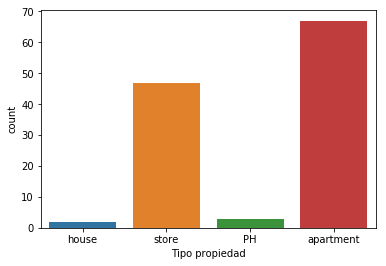

In [81]:
#Distribución de las propiedades a comprar por tipo de propiedad
sns.countplot(prop_a_comprar['Tipo propiedad'])

In [82]:
prop_a_comprar['Tipo propiedad'].value_counts()

apartment    67
store        47
PH            3
house         2
Name: Tipo propiedad, dtype: int64

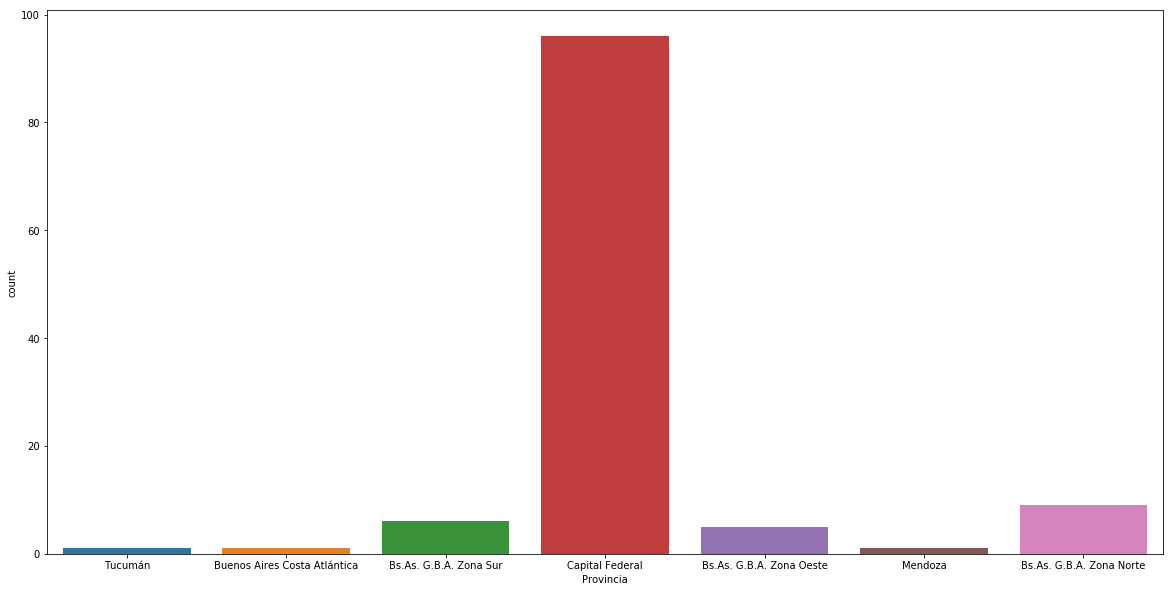

In [83]:
#Distribución de las propiedades a comprar por provincia
plt.figure(figsize=(20,10))
sns.countplot(prop_a_comprar['Provincia'])

In [84]:
prop_a_comprar['Provincia'].value_counts()

Capital Federal                 96
Bs.As. G.B.A. Zona Norte         9
Bs.As. G.B.A. Zona Sur           6
Bs.As. G.B.A. Zona Oeste         5
Buenos Aires Costa Atlántica     1
Tucumán                          1
Mendoza                          1
Name: Provincia, dtype: int64

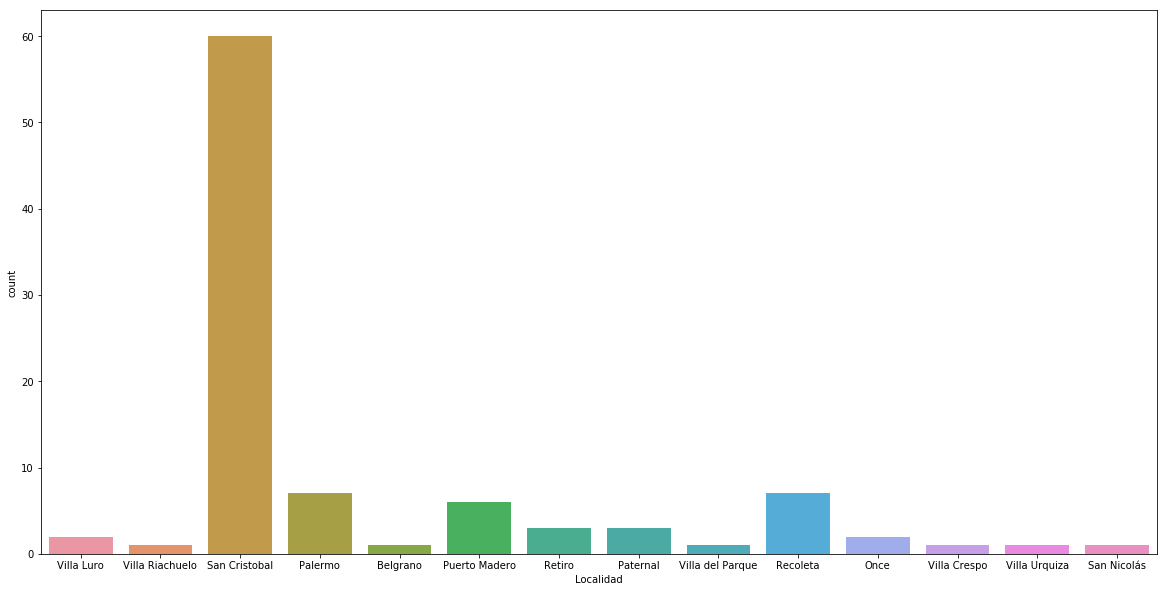

In [85]:
#Distribución de las propiedades a comprar por localidad de CABA
plt.figure(figsize=(20,10))
sns.countplot(prop_a_comprar[prop_a_comprar['Provincia']=='Capital Federal']['Localidad'])

In [86]:
prop_a_comprar[prop_a_comprar['Provincia']=='Capital Federal']['Localidad'].value_counts()

San Cristobal       60
Palermo              7
Recoleta             7
Puerto Madero        6
Paternal             3
Retiro               3
Once                 2
Villa Luro           2
Villa Crespo         1
Villa Riachuelo      1
Belgrano             1
Villa Urquiza        1
Villa del Parque     1
San Nicolás          1
Name: Localidad, dtype: int64

In [87]:
prop_a_comprar.columns

Index(['USD por m2 cub.', 'Pozo', 'Estrenar', 'Amenities',
       'USD por m2 cub. estimado', 'Tipo propiedad', 'Localidad',
       'Ubicación completa', 'Provincia', 'Precio aprox USD', 'Título',
       'M2 cubiertos', 'Precios USD real', 'Precios USD estimado',
       'Dif. m2 cubierto USD', 'Dif. m2 cubierto %', 'Valuacion', 'Sum acum'],
      dtype='object')

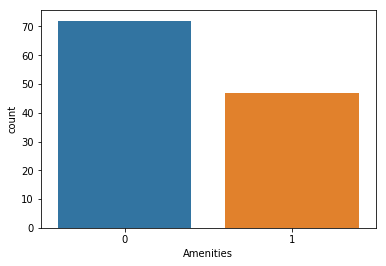

In [88]:
#Propiedades con y sin amenities
sns.countplot(prop_a_comprar['Amenities'])

In [89]:
prop_a_comprar['Amenities'].value_counts()

0    72
1    47
Name: Amenities, dtype: int64

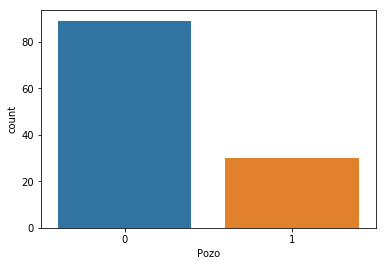

In [90]:
#Propiedades de pozo
sns.countplot(prop_a_comprar['Pozo'])

In [91]:
prop_a_comprar['Pozo'].value_counts()

0    89
1    30
Name: Pozo, dtype: int64

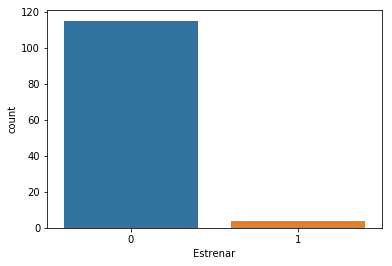

In [92]:
#Propiedades a estrenar
sns.countplot(prop_a_comprar['Estrenar'])

In [93]:
prop_a_comprar['Estrenar'].value_counts()

0    115
1      4
Name: Estrenar, dtype: int64

In [94]:
prop_a_comprar=prop_a_comprar[['Tipo propiedad','Ubicación completa','M2 cubiertos',
                              'Precios USD real','Precios USD estimado','Título']]

prop_a_comprar['Precios USD real']=round(prop_a_comprar['Precios USD real'],2)
prop_a_comprar['Ganancia']=round(prop_a_comprar['Precios USD estimado'],2)-round(prop_a_comprar['Precios USD real'],2)
prop_a_comprar.head(20)

,Tipo propiedad,Ubicación completa,M2 cubiertos,Precios USD real,Precios USD estimado,Título,Ganancia
113192,house,|Argentina|Tucumán|San Miguel de Tucumán|,200.0,218726.33,1707651.63,Casa - San Miguel De Tucumán,1488925.30
83643,store,|Argentina|Buenos Aires Costa Atlántica|Villa ...,160.0,160000.00,1271230.37,Local a la venta con excelente ubicación en Vi...,1111230.37
64141,store,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,270.0,140000.00,1814924.28,Ideal super o inversor para renta,1674924.28
18516,store,|Argentina|Capital Federal|Villa Luro|,170.0,185000.00,1224288.48,Venta Galpón p/ Deposito o Taller mecanico - V...,1039288.48
71574,store,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,672.0,500000.00,4583299.34,Edificio Comercial - Turdera,4083299.34
25261,store,|Argentina|Capital Federal|Villa Luro|,21.0,46000.00,151235.64,LOCAL CON GAS IDEAL GASTRONOMIA,105235.64
21356,PH,|Argentina|Capital Federal|Villa Riachuelo|,66.0,150000.00,479879.52,"PH 4 Amb - Ferré 6500, Villa Riachuelo",329879.52
24104,apartment,|Argentina|Capital Federal|San Cristobal|,40.0,2371.74,171872.96,sj302- DEPA EN TORRE - 2 AMB EN CUOTAS DESDE $...,169501.22
24448,apartment,|Argentina|Capital Federal|San Cristobal|,38.0,2271.06,163279.32,tor922- Vivienda de 38m2 en cuotas de $ 10.422...,161008.26
24165,apartment,|Argentina|Capital Federal|San Cristobal|,40.0,5314.08,171872.96,mir520 PARQUE PATRICIOS EN CUOTAS POR VARIOS AOS,166558.88
